# Stable Voting Examples

Code for testing examples from the paper [Stable Voting](https://arxiv.org/abs/2108.00542) by W. Holliday and E. Pacuit.   

Consult [https://github.com/voting-tools/election-analysis](https://github.com/voting-tools/election-analysis) for further discussion of these examples and analyses of other elections. 

In [1]:
# import the Profile class
from pref_voting.profiles_with_ties import ProfileWithTies
from pref_voting.weighted_majority_graphs import MarginGraph

# import the voting methods
from pref_voting.voting_methods import *

from preflibtools.instances import OrdinalInstance # use the preflibtools 

## Example 1: 2009 Mayoral Election in Burlington, Vermont

In [2]:
short_candname = {
    "Bob Kiss": "P",
    "Andy Montroll": "D",
    "James Simpson": "G",
    "Dan Smith": "I",
    "Kurt Wright": "R",
    "Write-In": "W",
}

rc_winner = 'P'

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./preflib-data/00005-00000002.toi")

rankings = list()
rcounts = list()
for order in instance.orders:
    
    rank = dict()
    
    for r,cs in enumerate(order): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()
#prof.display_rankings()




There are 6 candidates and 8980 rankings:  
        The number of empty rankings: 0
        The number of rankings with ties: 6
        The number of linear orders: 0
        The number of truncated linear orders: 8974
        
The number of rankings with skipped ranks: 0
        
        


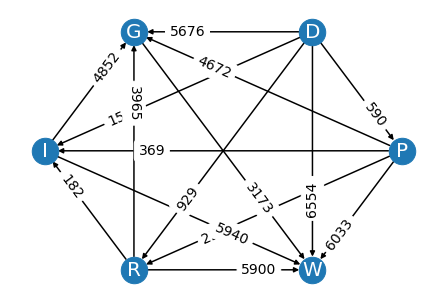

There are 0 cycles. 



In [3]:

prof.use_extended_strict_preference()

prof.display_margin_graph()

prof.margin_graph().display_cycles()


In [4]:
cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")

The Condorcet winner is D.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Copeland winner is {D}

The Condorcet loser is W.


In [5]:
truncated_prof, report = prof.truncate_overvotes()

for r, new_r, count in report: 
    print(f"{r} changed to {new_r} for {count} voters")
# instant_runoff(truncated_prof)

( P  W )R D I G  changed to  for 1 voters
( R  W )I D G P  changed to  for 1 voters
( R  W )D P I  changed to  for 1 voters
D I ( G  R )P  changed to D I  for 1 voters
R I ( P  D ) changed to R I  for 1 voters
( R  W )D  changed to  for 1 voters


In [6]:
irv_winner = instant_runoff_for_truncated_linear_orders(truncated_prof)

print(f"The IRV winner is {cmap[rc_winner]}")
print(f"The margins of {cmap[rc_winner]} over each other candidate is: ")
for c in prof.candidates: 
    if c != rc_winner:
        print(f"\tThe margin of {cmap[rc_winner]} over {cmap[c]} is {prof.margin(rc_winner, c)}")

The IRV winner is P
The margins of P over each other candidate is: 
	The margin of P over D is -590
	The margin of P over G is 4672
	The margin of P over I is 369
	The margin of P over R is 250
	The margin of P over W is 6033


## Example 2: 2007 Glasgow City Council election for Ward 5

In [7]:

short_candname = {
    "Shaukat Butt": "B",
    "Michael Cobley": "C",
    "Stephen Dornan": "D",
    "John Flanagan": "F",
    "Alan L Hughes": "H1",
    "Allison Hunter": "H2",
    "Will Jess": "J",
    "Irene Lang": "L", 
    "Patricia Mcintyre": "M1",
    "George Douglas Mcnee": "M2",
    "Carolina Perez": "P",
}

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./preflib-data/00008-00000009.soi")

rankings = list()
rcounts = list()
for o in instance.orders:
    order = o
    rank = dict()
    
    for r,cs in enumerate(o): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
    

prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()
#prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 11 candidates and 9560 rankings:  
        The number of empty rankings: 0
        The number of rankings with ties: 0
        The number of linear orders: 369
        The number of truncated linear orders: 9191
        
The number of rankings with skipped ranks: 0
        
        


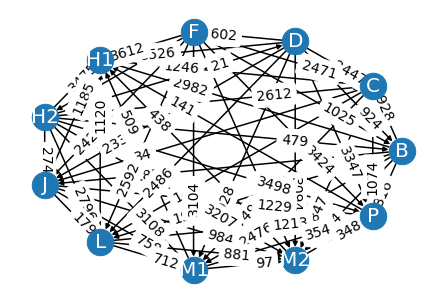

There is 1 cycle: 



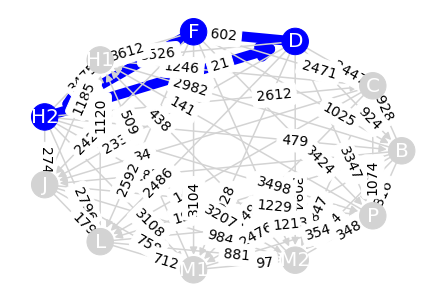

In [8]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()



Smith Set winners are {D, F, H2}
Restrict to the Smith Set: 
H2  2521
F  768
 1657
D F  1343
D  681
F D  908
H2 D  235
H2 F  204
H2 D F  251
D H2  129
F H2  140
D F H2  302
H2 F D  177
F D H2  143
D H2 F  51
F H2 D  50


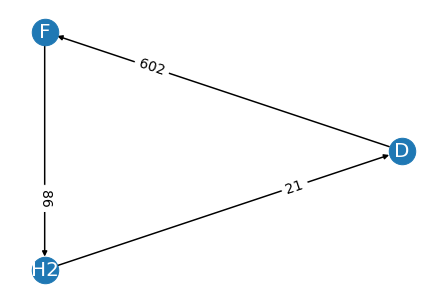

In [9]:
smith_set.display(prof)

print("Restrict to the Smith Set: ")
smith = smith_set(prof)

restricted_prof = prof.remove_candidates([c for c in prof.candidates if c not in smith])

restricted_prof.display_rankings()
restricted_prof.use_extended_strict_preference()

restricted_prof.display_margin_graph()




In [10]:
cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
ranked_pairs.display(prof)



There is no Condorcet winner.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Ranked Pairs winner is {D}


## Examples 3 and 4

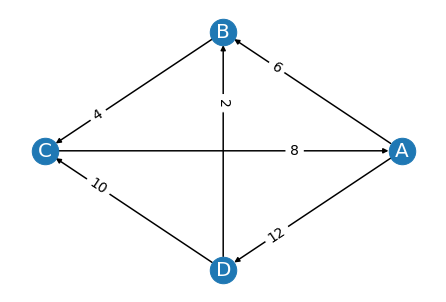

Stable Voting winner is {A}
Simple Stable Voting winner is {A}
Beat Path winner is {A}
Ranked Pairs winner is {A}



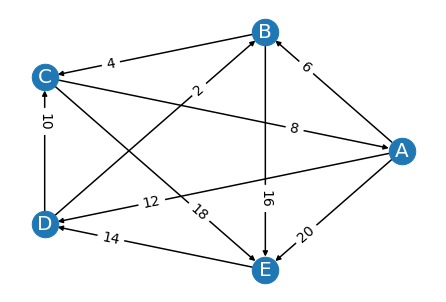

Stable Voting winner is {A}
Simple Stable Voting winner is {A}
Beat Path winner is {B}
Ranked Pairs winner is {C}


In [11]:
A = "A"
B = "B"
C = "C"
D = "D"
E = "E"

mg = MarginGraph(
    [A, B, C, D],
    [
        (A, B, 6),
        (A, D, 12),
        (B, C, 4), 
        (C, A, 8), 
        (D, B, 2),
        (D, C, 10)
    ]
)

mg.display()

stable_voting.display(mg)
simple_stable_voting.display(mg)
beat_path_faster.display(mg)
ranked_pairs.display(mg)

print("")


mg2 = MarginGraph(
    [A, B, C, D, E],
    [
        (A, B, 6),
        (A, D, 12),
        (B, C, 4), 
        (C, A, 8), 
        (D, B, 2),
        (D, C, 10),
        (A, E, 20), 
        (B, E, 16), 
        (C, E, 18), 
        (E, D, 14)
    ]
)

mg2.display()

stable_voting.display(mg2)
simple_stable_voting.display(mg2)
beat_path_faster.display(mg2)
ranked_pairs.display(mg2)

